*   Multimídia - Compressão I (Exercício 2)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que realiza a codificação Run Length de um conjunto de dados armazenados em um vetor "V"
def rle(V):

  #Obtenção do comprimento do vetor
  n_elem = len(V)

  #Variável para armazenamento da informação codificada
  encod = V[0]

  count = 1
    
  #Laço que analisa cada dado do vetor e realiza a codificação
  for i in range(1, n_elem):

    #Verifica se o caractere atual é igual ao anterior
    #Se não for, e se a contagem for maior que 1 (cotagem igual a 1 não necessita ser adicionada), adicionamos o caractere e sua contagem ao código 
    if V[i] != V[i - 1]:

      if count > 1:

        #Adicionamos a contagem ao código
        encod +=  str(count)

        #Reinicia a contagem
        count = 1

      #Adicionamos o caractere ao código
      encod += V[i] 
    
    #Se o caractere anterior for igual ao atual, incrementamos a contagem
    else:

      count += 1

      #Ainda, se o caractere for o último da string, paramos a contagem e adicionamos ao código
      if i == n_elem - 1: 

        encod += str(count)

  return encod

Utilizando o algoritmo Run Length, 2 arquivos distintos serão codificados: uma imagem binária e um arquivo de texto. Para medir a eficiência dessa técnica, será calculada a taxa de compressão.

In [ ]:
#Declaração das bibliotecas necessárias, definição do diretório raíz e montagem do diretório
from google.colab import drive
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Codificação de texto, com entrada de dados pelo usuário 

#Carregamento do texto
txt = input("Insira um texto a ser codificado: ") 

#Cálculo da codificação RLE
cod = rle(txt)

print("Codificação do texto (RLE):", cod)

#Cálculo da taxa de compressão
print("Taxa de compressão:", len(txt) / len(cod))

Insira um texto a ser codificado: WWWWWWWWWWWWBWWWWWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW
Codificação do texto (RLE): W12BW12B3W24BW14
Taxa de compressão: 4.1875


In [ ]:
#Codificação de texto, com entrada de dados por arquivo

#Carregamento do texto
txt = open(root_path + 'brandenburg.txt', 'r')

#Obtenção da string do arquivo
string = txt.read()
txt.close()

#Mostrar conteúdo do arquivo de texto
print("Texto original:", string)

#Cálculo da codificação RLE
cod = rle(string)

print("Codificação do texto (RLE):", cod)

#Cálculo da taxa de compressão
print("Taxa de compressão:", len(string) / len(cod))

Texto original: The Brandenburg Concertos by Johann Sebastian Bach (BWV 1046–1051, original title: Six Concerts à plusieurs instruments) are a collection of six instrumental works presented by Bach to Christian Ludwig, Margrave of Brandenburg-Schwedt,in 1721 (though probably composed earlier). They are widely regarded as some of the best orchestral compositions of the Baroque era.

Codificação do texto (RLE): The Brandenburg Concertos by Johan2 Sebastian Bach (BWV 1046–1051, original title: Six Concerts à plusieurs instruments) are a col2ection of six instrumental works presented by Bach to Christian Ludwig, Margrave of Brandenburg-Schwedt,in 1721 (though probably composed earlier). They are widely regarded as some of the best orchestral compositions of the Baroque era.

Taxa de compressão: 1.0


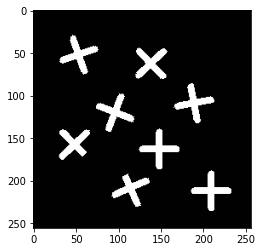

Codificação da imagem (RLE): 07470102551402501602501702491702491702481902481802481902471902481802481902471902481801612010228190121902261909112048101781806115046150251301481902119045160221601481280451802018014712804519017111014612604711001511101461240511100131120143124054111011112014112405811109112013912406211107112013712406611105112013612606711103112013612706811101120137127069122013711703190691200139113071807011801391110101907011501421701319070114014512017180711120165190701120165190691140165180681160164190661180163190641210163180631230162190611120211101621806011204111016118059112061110160190571120811101611605711201011101601505911001211101601060111014111022119016111021919018190221170201902201502317022310251013015671302511602491702491702481802481902481802481802481802481802481902481801661010107718016616076180165170761801641907519016101461807718011180143190771805115014219077128014218078129014019076131014018071137013919066141012110101619064140012218013180631360128110010190621320132114071806

In [ ]:
#Codificação de imagem binária

#Carregamento da imagem
im = Image.open(root_path + 'art.png')

#Mostrar a imagem
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

#Transformação da imagem em matriz
pixel = asarray(im)

#Obtenção das dimensões da imagem
n_rows, n_columns = pixel.shape

txt_pixel = ""

#Conversão da matriz em string
for i in range(n_rows):

  for j in range(n_columns):

    txt_pixel += str(pixel[i, j])

#Cálculo da codificação RLE
cod = rle(txt_pixel)

print("Codificação da imagem (RLE):", cod)

#Cálculo da taxa de compressão
print("Taxa de compressão:", (n_rows * n_columns) / len(cod))

Após as implementações, temos a seguinte conclusão a respeito da codificação RLE:

No primeiro teste, observamos que, para strings com muita repetição consecutiva de caracteres, essa codificação é interessante. Obtivemos uma taxa de compressão de aproximadamente 4.18;

No segundo teste, observamos que, para strings sem muita repetição seguida de caracteres, como um texto normal em inglês, essa codificação é inútil. Obtivemos uma taxa de compressão de 1.0;

No terceiro teste, observamos que, para imagens binárias, essa codificação é muito interessante. Obtivemos uma taxa de compressão de aproximadamente 26.13.